##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [2]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [8]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

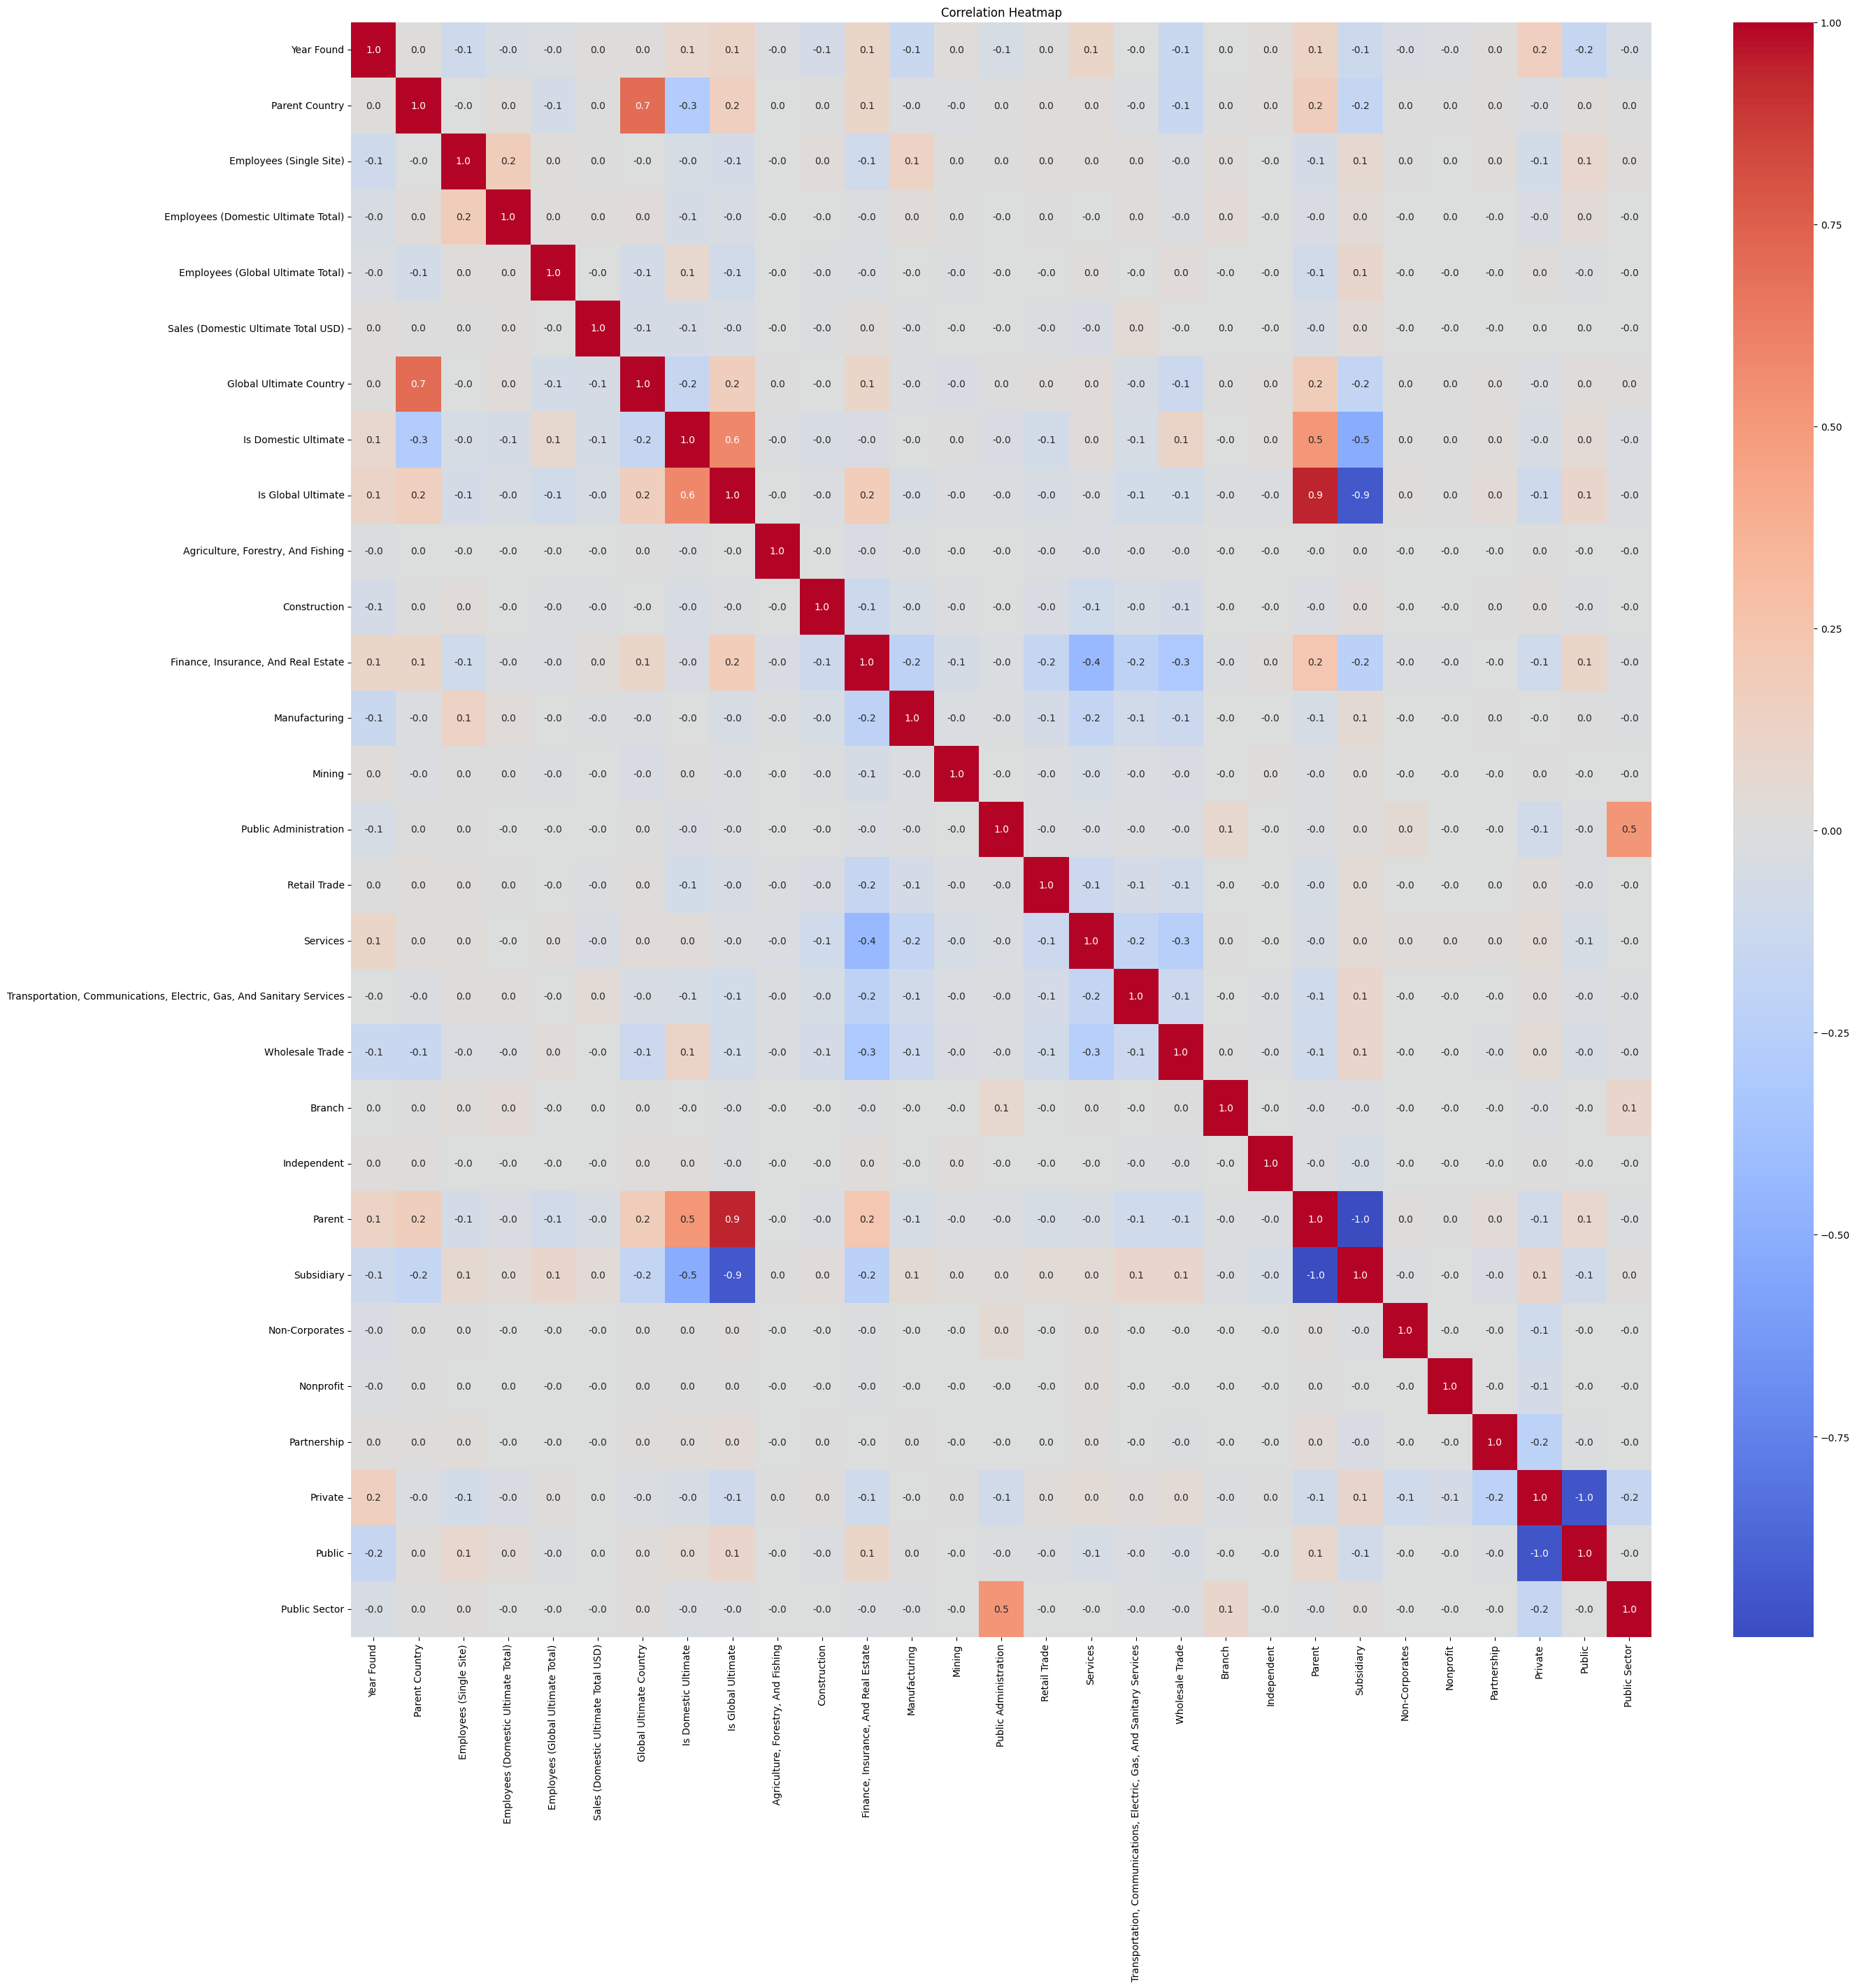

Features in Descending Order of Correlation:
 Global Ultimate Country                                                 0.060760
Is Domestic Ultimate                                                    0.056515
Transportation, Communications, Electric, Gas, And Sanitary Services    0.047409
Is Global Ultimate                                                      0.040201
Subsidiary                                                              0.038416
Parent                                                                  0.038329
Services                                                                0.032597
Finance, Insurance, And Real Estate                                     0.022524
Employees (Domestic Ultimate Total)                                     0.016033
Year Found                                                              0.015215
Retail Trade                                                            0.013135
Manufacturing                                                  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 2.8464460865384255e+19
R-squared: 0.8229674372726017


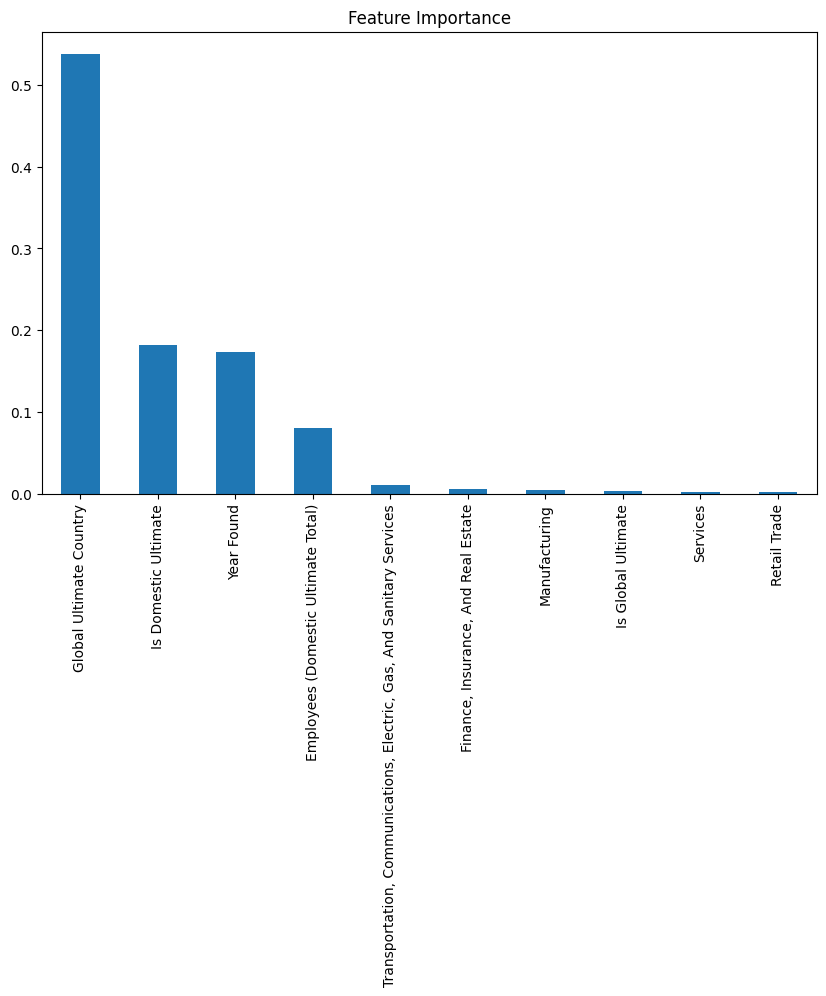

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklea

Average R²: 0.6795336749207752
Average Adj R²: 0.6783941720277199
Average AIC/BIC: [1243805.61467118 1243895.18680975]
Average MSE: 2.5517958476898365e+19
Average MAE: 689706580.1512997


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1.9609856963663528e+19
R-squared: 0.7890017547141321


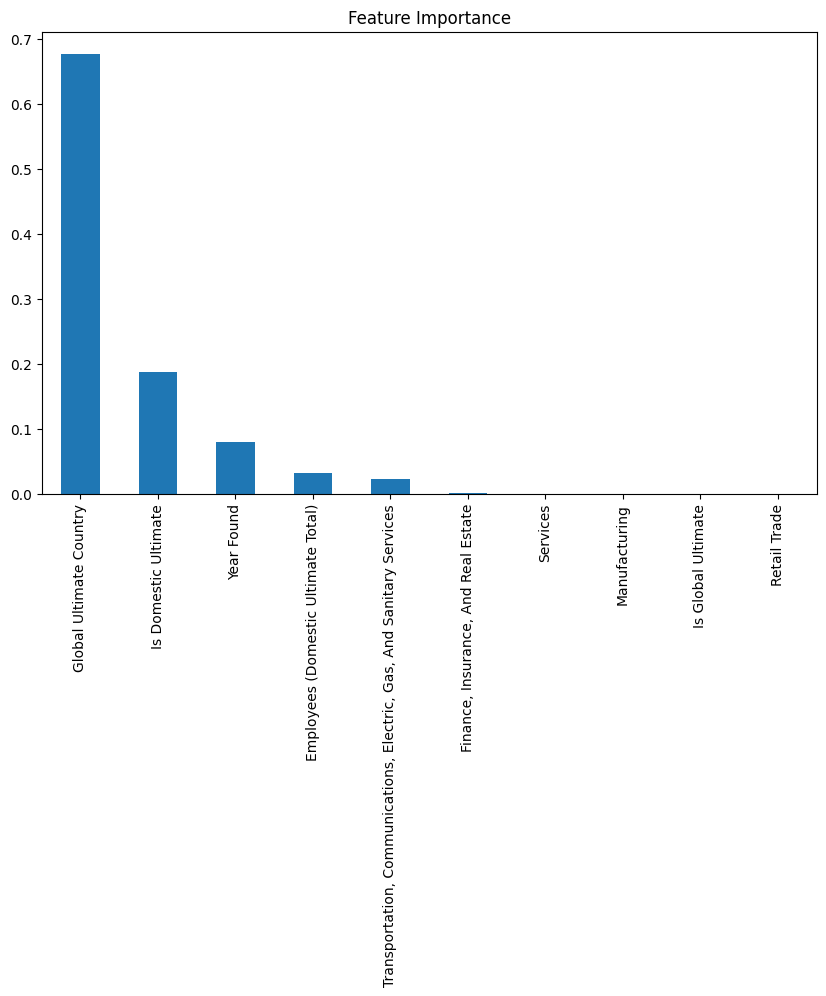

In [38]:
import csv
import pandas as pd
import numpy as np

data = pd.read_csv(filepath)

# get information about our dataframe
print(data.info())

# find the number of rows and columns in our dataset
print(data.shape)

# find the names of columns in our dataset
print(data.columns)

# data_processing
def data_processing(data):
    # Drop columns that are not necessary
    columns_to_drop = ["LATITUDE", "LONGITUDE", '8-Digit SIC Code', 'Sales (Global Ultimate Total USD)', "AccountID", "Company", "Industry", "8-Digit SIC Description", "Parent Company", "Company Description", "Square Footage", "Company Status (Active/Inactive)", "Import/Export Status", "Fiscal Year End", "Global Ultimate Company", "Domestic Ultimate Company"]
    data = data.drop(columns=columns_to_drop)

    # Drop null values for 3 variables
    data = data.dropna(subset=["Year Found", "Parent Country", "Global Ultimate Country"])
    print(data.isna().sum())

    # Categorizing "SIC Code" for One-hot encoding
    data['SIC Code'] = pd.to_numeric(data['SIC Code'])

    def categorize_industry(sic_code):
        if 100 <= sic_code <= 999:
            return 'Agriculture, Forestry, And Fishing'
        elif 1000 <= sic_code <= 1499:
            return 'Mining'
        elif 1500 <= sic_code <= 1799:
            return 'Construction'
        elif 2000 <= sic_code <= 3999:
            return 'Manufacturing'
        elif 4000 <= sic_code <= 4999:
            return 'Transportation, Communications, Electric, Gas, And Sanitary Services'
        elif 5000 <= sic_code <= 5199:
            return 'Wholesale Trade'
        elif 5200 <= sic_code <= 5999:
            return 'Retail Trade'
        elif 6000 <= sic_code <= 6799:
            return 'Finance, Insurance, And Real Estate'
        elif 7000 <= sic_code <= 8999:
            return 'Services'
        elif 9000 <= sic_code <= 9999:
            return 'Public Administration'
        else:
            return 'Other'  # Handle cases not covered by the specified ranges

    # Apply the categorization function to create a new 'Industry' column
    data['Industry'] = data['SIC Code'].apply(categorize_industry)

    # Drop the original SIC Code column
    data = data.drop('SIC Code', axis=1)

    # One-Hot Encoding for "Industry"
    industry_frequency = data["Industry"].value_counts()
    industry_dummies = pd.get_dummies(data["Industry"])
    data = pd.concat([data, industry_dummies], axis='columns')
    data = data.drop(['Industry'], axis='columns')

    # One-Hot Encoding for "Entity Type"
    entity_frequency = data["Entity Type"].value_counts()
    # 4 categories: "Branch", "Independent", "Parent", "Subsidiary"
    entity_dummies = pd.get_dummies(data["Entity Type"])
    data = pd.concat([data, entity_dummies], axis='columns')
    data = data.drop(['Entity Type'], axis='columns')

    # One-Hot Encoding for "Ownership Type"
    ownership_frequency = data["Ownership Type"].value_counts()
    # 6 categories: "Private", "Public", "Partnership", "Public Sector", "Non-Corporates", "Nonprofit"
    ownership_dummies = pd.get_dummies(data["Ownership Type"])
    data = pd.concat([data, ownership_dummies], axis='columns')
    data = data.drop(['Ownership Type'], axis='columns')

    # Label Encoding for Parent Country
    from sklearn.preprocessing import LabelEncoder

    parent_frequency = data['Parent Country'].value_counts()
    parent_frequency # 69 countries
    threshold = 3 # Set a threshold for low-frequency countries

    # Identify Countries with frequency below the threshold
    low_frequency_parent_country = parent_frequency[parent_frequency < threshold].index

    # Replace these low-frequency countries with a common label "Others"
    data['Parent Country'] = data['Parent Country'].replace(low_frequency_parent_country, 'Others')

    parent_frequency1 = data['Parent Country'].value_counts()
    data['Parent Country'] = data['Parent Country'].astype(str)
    label_encoder = LabelEncoder()
    data['Parent Country'] = label_encoder.fit_transform(data['Parent Country'])

    # Label Encoding for Global Ultimate Country
    global_frequency = data['Global Ultimate Country'].value_counts()
    global_frequency # 74 countries
    threshold = 5 # Set a threshold for low-frequency countries

    # Identify Countries with frequency below the threshold
    low_frequency_global_country = global_frequency[global_frequency < threshold].index

    # Replace these low-frequency countries with a common label "Others"
    data['Global Ultimate Country'] = data['Global Ultimate Country'].replace(low_frequency_global_country, 'Others')

    global_frequency1 = data['Global Ultimate Country'].value_counts()
    data['Global Ultimate Country'] = data['Global Ultimate Country'].astype(str)
    label_encoder = LabelEncoder()
    data['Global Ultimate Country'] = label_encoder.fit_transform(data['Global Ultimate Country'])

    return data

data = data_processing(data)

# Predicting missing values using Bayesian Linear Regression (Regression Imputation)
def imputing(data):
    import numpy as np
    import pandas as pd
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    from sklearn.linear_model import BayesianRidge

    missing_col = ['Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)']
    column_list = data.columns.tolist()
    predic_col = [col for col in column_list if col not in missing_col]

    imputer = IterativeImputer(estimator=BayesianRidge())
    imputed_data = imputer.fit_transform(data[predic_col + missing_col])
    data[missing_col] = imputed_data[:, -len(missing_col):]

    return data

data = imputing(data)

# Check the number of null values
print(data.isna().sum())

# Data Visualization using correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

correlation_matrix = data.corr()
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title("Correlation Heatmap")
plt.show()
# 0.9 -- "Is Global Ultimate" = "Parent", "Subsidary"

# Feature Scaling - Normalizarion
def feature_scaling(data):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    #data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data

data = feature_scaling(data)

# Feature Selection
target_feature = 'Sales (Domestic Ultimate Total USD)'

correlation_with_target = correlation_matrix[target_feature]
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)
sorted_correlations = sorted_correlations.drop(target_feature)

print("Features in Descending Order of Correlation:\n", sorted_correlations)
print("Top 10 Features:\n", sorted_correlations[:10])

# Splitting train and test dataset
from sklearn.model_selection import train_test_split

# X variables are chosen according to the 'Top 10 Features'
def feature_selection(data):
    columns_to_keep = ['Global Ultimate Country', 'Is Domestic Ultimate', 'Transportation, Communications, Electric, Gas, And Sanitary Services', 'Is Global Ultimate', 'Services', 'Finance, Insurance, And Real Estate', 'Employees (Domestic Ultimate Total)', 'Year Found', 'Retail Trade', 'Manufacturing']
    data = data[columns_to_keep]
    return data

# Filter X variables
X = feature_selection(data)

y = data[['Sales (Domestic Ultimate Total USD)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import libraries required for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Cross Validation with k_fold (k=10) - Random Forest Regressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_absolute_error
import statsmodels.api as sm

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Custom scoring functions
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Store metrics for each fold
r2_scores = []
adj_r2_scores = []
aic_bic_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit RandomForestRegressor
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Calculate R² and adjusted R²
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Calculate AIC/BIC using statsmodels
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    aic_bic = model.aic, model.bic

    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics for each fold
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    aic_bic_scores.append(aic_bic)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Display the results
print(f"Average R²: {np.mean(r2_scores)}")
print(f"Average Adj R²: {np.mean(adj_r2_scores)}")
print(f"Average AIC/BIC: {np.mean(aic_bic_scores, axis=0)}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")

# Gradient Boosting Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')

# Feature importance
feature_importances = pd.Series(gbm_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [39]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    
    hidden_data = data_processing(hidden_data)
    hidden_data = imputing(hidden_data)
    hidden_data = feature_scaling(hidden_data)
    hidden_data = feature_selection(hidden_data)
    predictions = gbm_model.predict(hidden_data)
    return predictions

##### Cell to check testing_hidden_data function

In [40]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

SIC Code                                   0
Year Found                                 0
Entity Type                                0
Parent Country                             0
Ownership Type                             0
Employees (Single Site)                12019
Employees (Domestic Ultimate Total)       73
Employees (Global Ultimate Total)       2719
Global Ultimate Country                    0
Is Domestic Ultimate                       0
Is Global Ultimate                         0
dtype: int64
[1.17603838e+08 1.77001453e+10 7.76153989e+07 ... 1.02766334e+08
 9.24060356e+07 1.08557047e+08]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!